## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY

https://github.com/cdt59/MPPP


In [ ]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt
# from planetaryimage import PDS3Image
# import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
# import colour_demosaicing
# import pandas as pd

%run MPPP.py

%matplotlib inline

In [31]:
# Set input path to IMG files and search criteria


# Set output directory
directory_output = 'Z:/Mastcam-Z/agisoft/images'

# Set input directory
directory_input  = 'Z:/Mastcam-Z/agisoft/data'

# directory_input  = 'C:/Users/cdt59/Desktop/Mars_2020_sol_681/data'
# directory_output = directory_input

sol = 77

# pre = 'Z*0_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_zcam'

pre = '*F_0'+str(sol)+'*_07'
suf = 'refs_'+str(sol).zfill(3)+'_ecam'

# pre = '*M_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vce_ecam'

# pre = '*V0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vec'

# pre = ''
# suf = 'references'

sequ_id = ''

path_input     = directory_input
IMG_paths      = [] 
IMG_paths     += sorted( glob.glob(  directory_input + '/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'F_0' in pre or 'V' in pre or 'M' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/sol_0*00s/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 


# IMG_paths = IMG_paths[:10]

print( len(IMG_paths), 'images\n')
IMG_paths

219 images



['Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\fcam\\FLF_0770_0735307506_800RAD_N0390650FHAZ02008_0A0095J01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\fcam\\FRF_0770_0735307506_800RAD_N0390650FHAZ02008_0A0095J01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\ncam\\NLF_0770_0735275907_909RAD_N0390000NCAM00501_0A0295J02.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\ncam\\NLF_0770_0735275967_034RAD_N0390000NCAM00501_0A0295J02.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\ncam\\NLF_0770_0735276045_987RAD_N0390000NCAM00501_0A0295J02.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\ncam\\NLF_0770_0735276113_691RAD_N0390000NCAM00501_0A0295J02.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\ncam\\NLF_0770_0735276184_944RAD_N0390000NCAM00501_0A0295J02.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00770\\ids\\rdr\\ncam\\NLF_0770_0735307364_034RAD_N0390650NCAM00709_0A0095J01.IMG',
 'Z:/Mastcam-Z/a

In [32]:
# # remove duplicates in image set

# %run MPPP.py
# remove_duplicate_IMGs( IMG_paths )

219 images

0 FLF_0770_0735307506_800RAD_N0390650FHAZ02008_0A0095J01.IMG
resizing image size (2880, 5120, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 960, 0 ]
sol 770 site 39 drive 650  zenith angle 3802 scale 0.60
 0 FLF_0770_0735307506_800RAD_N0390650FHAZ02008_0A0095J01.png	-4602.8032	2271.2838	146.8397	17.56	66.35	10


FRF_0770_0735307506_800RAD_N0390650FHAZ02008_0A0095J01.IMG failed to process! 

NLF_0770_0735275907_909RAD_N0390000NCAM00501_0A0295J02.IMG failed to process! 

3 NLF_0770_0735275967_034RAD_N0390000NCAM00501_0A0295J02.IMG
sol 770 site 39 drive 0  zenith angle 6526 scale 0.23
 3 NLF_0770_0735275967_034RAD_N0390000NCAM00501_0A0295J02.png	-4597.3167	2171.8923	150.6343	321.29	113.89	0


NLF_0770_0735276045_987RAD_N0390000NCAM00501_0A0295J02.IMG failed to process! 

5 NLF_0770_0735276113_691RAD_N0390000NCAM00501_0A0295J02.IMG
sol 770 site 39 drive 0  zenith angle 6650 scale 0.24
 5 NLF_0770_0735276113_691RAD_N0390000NCAM00501_0A0295J02.png	-4596.8639	2172.0054	15

sol 775 site 39 drive 668  zenith angle 3538 scale 0.77
 49 FLF_0775_0735747092_784RAD_N0390668FHAZ01225_0A0195J01.png	-4603.403	2269.807	146.7932	26.68	61.75	10


50 FLF_0775_0735752061_691RAD_N0390690FHAZ02008_0A0095J01.IMG
resizing image size (2880, 5120, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 960, 0 ]
sol 775 site 39 drive 690  zenith angle 3435 scale 0.56
 50 FLF_0775_0735752061_691RAD_N0390690FHAZ02008_0A0095J01.png	-4602.9762	2270.3017	146.7766	28.62	59.94	10


FRF_0775_0735736957_005RAD_N0390650FHAZ03267_0A0195J01.IMG failed to process! 

52 FRF_0775_0735747092_784RAD_N0390668FHAZ01225_0A0195J01.IMG
sol 775 site 39 drive 668  zenith angle 3544 scale 0.77
 52 FRF_0775_0735747092_784RAD_N0390668FHAZ01225_0A0195J01.png	-4603.2171	2269.6414	146.7958	49.39	61.85	-10


53 FRF_0775_0735752061_691RAD_N0390690FHAZ02008_0A0095J01.IMG
resizing image size (2880, 5120, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 960, 0 ]
sol 775 site 39 drive 690  zenith angle 345

92 FLF_0777_0735927214_396RAD_N0390690FHAZ00215_0A0075J02.IMG
resizing image size (960, 1280, 3) by padding = [ left, right, top, bottom ] = [ 2160, 1680, 1416, 1464 ]
sol 777 site 39 drive 690  zenith angle 3445 scale 0.67
 92 FLF_0777_0735927214_396RAD_N0390690FHAZ00215_0A0075J02.png	-4602.9772	2270.3	146.7801	28.63	60.11	10


93 FLF_0777_0735927214_396RAD_N0390690FHAZ00215_0A0275J01.IMG
resizing image size (680, 1280, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 608, 0 ]
FLF_0777_0735927214_396RAD_N0390690FHAZ00215_0A0275J01.IMG failed to process! 

FLF_0777_0735927214_396RAD_N0390690FHAZ00215_0M0075J01.IMG failed to process! 

95 FLF_0777_0735927274_411RAD_N0390690FHAZ00215_0A0075J01.IMG
resizing image size (960, 1280, 3) by padding = [ left, right, top, bottom ] = [ 2160, 1680, 1416, 1464 ]
sol 777 site 39 drive 690  zenith angle 3446 scale 0.67
 95 FLF_0777_0735927274_411RAD_N0390690FHAZ00215_0A0075J01.png	-4602.9774	2270.2998	146.7806	28.63	60.14	10


FLF_0777_07359272

124 FLF_0777_0735927754_428RAD_N0390690FHAZ00215_0M0075J01.IMG
resizing image size (2720, 5120, 3) by padding = [ left, right, top, bottom ] = [ 0, 1680, 608, 1464 ]
FLF_0777_0735927754_428RAD_N0390690FHAZ00215_0M0075J01.IMG failed to process! 

125 FLF_0777_0735927814_428RAD_N0390690FHAZ00215_0A0075J01.IMG
resizing image size (960, 1280, 3) by padding = [ left, right, top, bottom ] = [ 2160, 1680, 1416, 1464 ]
sol 777 site 39 drive 690  zenith angle 3445 scale 0.65
 125 FLF_0777_0735927814_428RAD_N0390690FHAZ00215_0A0075J01.png	-4602.9772	2270.2999	146.7801	28.62	60.12	10


126 FLF_0777_0735927814_428RAD_N0390690FHAZ00215_0A0275J01.IMG
resizing image size (680, 1280, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 608, 0 ]
FLF_0777_0735927814_428RAD_N0390690FHAZ00215_0A0275J01.IMG failed to process! 

FLF_0777_0735927814_428RAD_N0390690FHAZ00215_0M0075J01.IMG failed to process! 

128 FLF_0777_0735927874_428RAD_N0390690FHAZ00215_0A0075J01.IMG
resizing image size (960, 1280, 3) b

157 FRF_0777_0735926527_816RAD_N0390690FHAZ00203_0M0195J01.IMG
sol 777 site 39 drive 690  zenith angle 3468 scale 0.70
 157 FRF_0777_0735926527_816RAD_N0390690FHAZ00203_0M0195J01.png	-4602.7965	2270.1291	146.7867	51.67	60.52	-10


158 FRF_0777_0735928278_036RAD_N0390690FHAZ00203_0A0195J01.IMG
resizing image size (296, 680, 3) by padding = [ left, right, top, bottom ] = [ 3760, 0, 1328, 0 ]
FRF_0777_0735928278_036RAD_N0390690FHAZ00203_0A0195J01.IMG failed to process! 

159 FRF_0777_0735928278_036RAD_N0390690FHAZ00203_0A0295J01.IMG
sol 777 site 39 drive 690  zenith angle 3467 scale 0.63
 159 FRF_0777_0735928278_036RAD_N0390690FHAZ00203_0A0295J01.png	-4602.7963	2270.1289	146.7865	51.65	60.51	-10


160 FRF_0777_0735928278_036RAD_N0390690FHAZ00203_0A1195J01.IMG
resizing image size (1544, 2560, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 752, 0 ]
FRF_0777_0735928278_036RAD_N0390690FHAZ00203_0A1195J01.IMG failed to process! 

161 FRF_0777_0735928278_036RAD_N0390690FHAZ00203_0M0195J

193 NLF_0770_0735308903_284RAD_N0390650NCAM12770_0A0195J01.IMG
resizing image size (960, 2560, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 0, 960 ]
sol 770 site 39 drive 650  zenith angle 4635 scale 0.53
 193 NLF_0770_0735308903_284RAD_N0390650NCAM12770_0A0195J01.png	-4602.6573	2270.7993	148.0341	353.61	80.89	0


194 NLF_0770_0735309304_552RAD_N0390650NCAM00501_0A0295J01.IMG
sol 770 site 39 drive 650  zenith angle 6442 scale 0.51
 194 NLF_0770_0735309304_552RAD_N0390650NCAM00501_0A0295J01.png	-4602.24	2270.8168	148.1022	120.64	112.42	0


195 NLF_0775_0735751927_800RAD_N0390690NCAM00709_0A0095J02.IMG
resizing image size (2880, 3840, 3) by padding = [ left, right, top, bottom ] = [ 1144, 136, 656, 304 ]
sol 775 site 39 drive 690  zenith angle 2340 scale 0.57
 195 NLF_0775_0735751927_800RAD_N0390690NCAM00709_0A0095J02.png	-4602.8421	2269.9598	147.9306	15.16	40.85	0


196 NLF_0775_0735752476_770RAD_N0390690NCAM03775_0A0195J01.IMG
sol 775 site 39 drive 690  zenith angle 3433 scal

<Figure size 640x480 with 0 Axes>

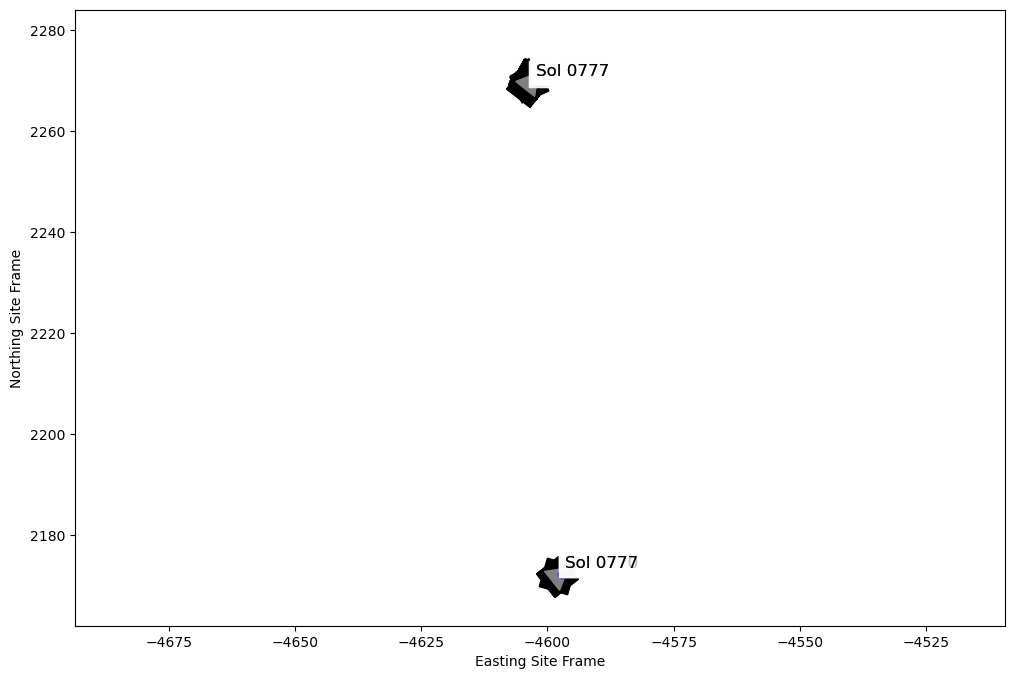

In [33]:
%%time

# time.sleep(1000)

%run MPPP.py

image_list_process( IMG_paths[:], directory_output, suf, find_offsets_mode = 0 )

In [ ]:
# For find_offset_mode = 1

# # pos_lines  = []
# # rover_xyzs = []
# # im_xyzs    = []
# # sols       = []
# # rmcs = []
sites  = [ rmcs[i][0] for i in range(len(rmcs))[::-1] ]
drives = [ rmcs[i][1] for i in range(len(rmcs))[::-1] ]
Xs     = [ rover_xyzs[i][0] for i in range(len(rover_xyzs))[::-1] ]
Ys     = [ rover_xyzs[i][1] for i in range(len(rover_xyzs))[::-1] ]
Zs     = [ rover_xyzs[i][2] for i in range(len(rover_xyzs))[::-1] ]

table = np.stack( [sols[::-1], sites, drives, Xs, Ys, Zs], axis=1)
np.round( table, 4 )

np.savetxt( directory_output+"/offsets.csv", table, delimiter="\t")

In [ ]:
import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           ''+'\t',''+'\t',''+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )

In [ ]:
def xyz_shift_offsets( site, drive ):
    
    '''
    xyz_shift_offsets finds most accurate Site-Nav offset for each site index and drive
    
    '''

    # print( site, drive )

    parent_path  = os.path.split( os.getcwd() )[0]
    waypoint_shift_path = os.path.join( parent_path, 'params/Mars2020_waypoint_shifts.csv' )

    shift_params = np.loadtxt( waypoint_shift_path, delimiter=',', skiprows=1 )

    site_shifts  = shift_params[ np.where( shift_params[:,1]==site)[0] ]
    site_drives  = site_shifts[:,2]

    if drive in site_drives:
        drive_site_shift = site_shifts[ np.where( site_shifts[:,2]==drive)[0] ][0,:]

    elif drive > site_drives.min() and drive < site_drives.max():
        drive_site_shift = interp1d( site_shifts[:,2], site_shifts, axis=0)(drive)

    elif drive >= site_drives.max():
        drive_site_shift = site_shifts[-1,:]

    else:
        drive_site_shift = np.zeros(12)

    # print( drive_site_shift )
    x_shift, y_shift, z_shift = drive_site_shift[9:]

    # x_shift, y_shift, z_shift = [ 0,0,0 ]
 
    return x_shift, y_shift, z_shift

# def xyz_shift_offsets_add( site, drive ):

In [ ]:
import urllib.request, json 
waypoints_url = "https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json"

with urllib.request.urlopen( waypoints_url ) as url:
    data = json.loads(url.read().decode())

In [ ]:
site  = 34
drive = 0



site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


    
indexes = [] 
lines   = []

for i in range(len(data['features'])):
    
    site_i = data['features'][i]['properties']['site']
    
    if site_i == site:
        
        sol_i   =  data['features'][i]['properties']['sol']
        drive_i =  data['features'][i]['properties']['drive']
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
        line_i  =   '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format( E_i, N_i, A_i )
           
        indexes.append( i )
        lines.append( line_i )
        
lines

In [ ]:
lines   = []

for i in range(len(data['features'])):
    
    sol_i   =  data['features'][i]['properties']['sol']
    site_i = data['features'][i]['properties']['site']
    drive_i =  data['features'][i]['properties']['drive']
    
    if drive_i == 0:
        
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
#         line_i  =  '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t\n'.format( E_i, N_i, A_i )
        line_i  =  [ int(sol_i), int(site_i), int(drive_i), 0, 0, 0, '{:.3f}'.format(E_i), '{:.3f}'.format(N_i),  '{:.3f}'.format(A_i) ]
        print( line_i )
        lines.append( line_i )


## Ignore the notes below

In [ ]:
# '''
# df_refs : pandas dataframe that holds reference info for each image

# data saves in the output directory as a CSV file 'df'+output+'.csv' and as a python pickle 'df'+output+'.pkl'

# '''

# df_refs = pd.DataFrame( 
#     columns = [ 
#         'sol',           # sol number or Mars day since landing is a natural way to describe images.
#         'site',          # site index for the rover's location, site 3 is the landing site
#         'drive',         # drive index is where the rover is relative to the current site frame
#         'time',          # datetime of image capture
        
#         'xyz_enu',       # postition XYZ values in meters ENU = [xEast, yNorth, zUp ] from site 3 (note: as Metashape interprets XYZ)
#         'xyz_ned',       # postition XYZ values in meters NED = [xNorth, yEast, zDown] from site 3
#         'rot_rpy',       # rotation angles in RPY = [roll, pitch, yaw] in degrees (as Metashape interprets roll-pitch-yaw)
#         'rot_ypr',       # rotation angles in YPR = [yaw, pitch, roll] in degrees 
#         'rot_opk',       # rotation angles in OPK = [omega, phi, kappa] in degrees 
        
#         'site_wy',       # waypoint site index, same as the current site if 'site_wy' == 'site' 
#         'drive_wp',      # waypoint drive index, same as the current drive if 'drive_wy' == 'drive'      
#         'xyz_wp',        # waypoint postition XYZ values in meters NED = [xNorthing, yEasting, zElevation]
#         'xyz_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorth, yEast, zDown], 'xyz_site3'=[0,0,0] if site3 is the default reference frame
#         'nee_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorthing, yEasting, zElevation]
#         'lle_site3'      # postition in [longitude, latitude, elevation] Mars global coordinates        
       
#         'cahvor',        # the CAHVOR or CAHVORE camera model in rover frame [xFront, yRight, zDown]
#         'az_site',       # site-frame azimuth pointing in degrees clockwise from the North vector 
#         'el_site',       # site-frame elevation pointing in degrees positive from the horizone
#         'az_rover',      # rover-frame azimuth pointing in degrees clockwise from the rover's forward vector
#         'el_rover',      # rover-frame elevation pointing in degrees positive from the forward-right plane       
        
#         'ref',           # string that forms the image's line in the reference file for import to software (Metashape)
#         'filename',      # file name with .IMG extension
#         'filepath',      # complete file path to image at run time
# ])


# df_refs

In [ ]:
# ignore the below cells

In [ ]:
# Scam flatfield

path = 'C:/Users/cornell/Mastcam-Z/ws/seitah'
pre = 'L*_0510*'

RAD_paths = [] \
          + sorted( glob.glob(  path + '/' +pre+'*R*_N*.IMG' ) ) \

RAD_paths

ims = []
for i in range(len(RAD_paths))[:]:
    
    im_image = PDS3Image.open( RAD_paths[i] ).image
    ims.append( np.float64( im_image) )
    
flat = np.mean( ims, axis=0)
for i in range(3):
    flat[:,:,i] /= np.mean( flat[700:-700,700:-700,i] )
    
plt.imshow( flat/1.5 )

In [ ]:
x = np.arange(0, 2048)
y = np.arange(0, 2048)
xv, yv = np.meshgrid(x, y)

y0, x0, r0, p = [900,1000,1000,3]
dv = ( (xv-x0)**2 + (yv-y0)**2 )**(p/2)
dv /= (r0**p)*2
dv += 1

# lim = .8
# dv[ dv<lim]  =lim

dflat = flat.copy()
for i in range(3):
    dflat[:,:,i] *= dv
    
plt.imshow( dflat/2 )
plt.colorbar()

In [ ]:
dvl = np.mean( dflat[:,1000:1300], axis=1)
plt.plot(dvl)

dvl = np.mean( flat[:,1000:1300], axis=1)
plt.plot(dvl)
# flat = dflat.copy()